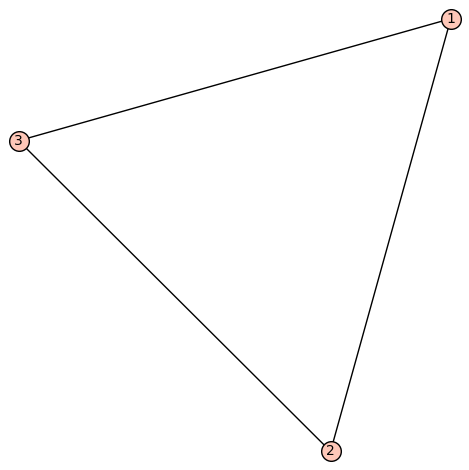

In [2]:
from sage.all import Graph, plot

G = Graph([(1,2), (2,3), (3,1)])
G.plot(vertex_labels=True).show()